In this notebook, we'll cover an implementation of the basic PageRank algorithm. In the example here, we will be working exclusively with a directed graphs.

PageRank was developed originally at Google by Larry Page and Sergey Brin. This algorithm is famous for being the original basis for the Google Search Engine. See: https://www.cis.upenn.edu/~mkearns/teaching/NetworkedLife/pagerank.pdf?ref=ruky.me 

PageRank tries to incorporate the fact that pages with many backlinks (i.e. other pages that link to it) should get more importance. But they go even further than simple citation/link counting, by adding modeling the importanc of page based on the number of important pages that link to it. A page that has a backlink from a very important website such as Yahoo.com, should get more importance then a page with many backlinks coming from only obscure websites. PageRank shows that page "importance" can be inferred simply from link strcuture


In [3]:
import sknetwork as skn
import numpy as np
from typing import Tuple, List
from IPython.display import SVG

In [4]:
edges = [("A", "B"),("B", "D"),("D", "A"),("D","C"),("A", "C"),("C", "A"),("D","E"),("F","D")]


In [5]:
graph = skn.data.from_edge_list(edges, directed=True)


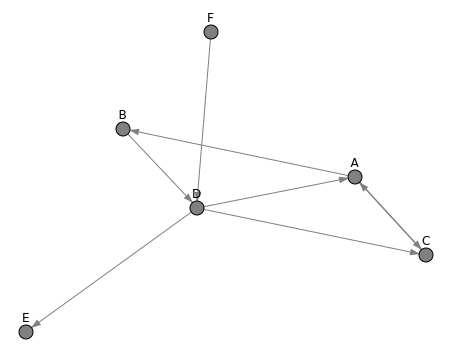

In [6]:
image = skn.visualization.graphs.visualize_graph(adjacency=graph.adjacency, names=graph.names, name_position='above')
SVG(image)

Start off by defining the simple Rank formula for node $u$:
$$R(u) = c \sum\limits_{v \in B(u)}\frac{R(v)}{N(v)}$$
where
 - $B(u)$ is the set of all nodes that point to $u$
 - $R(v)$ is the rank of one of the nodes points to $u$
 - $N(u)$ is the number of outgoing edges from node $v$

Example :
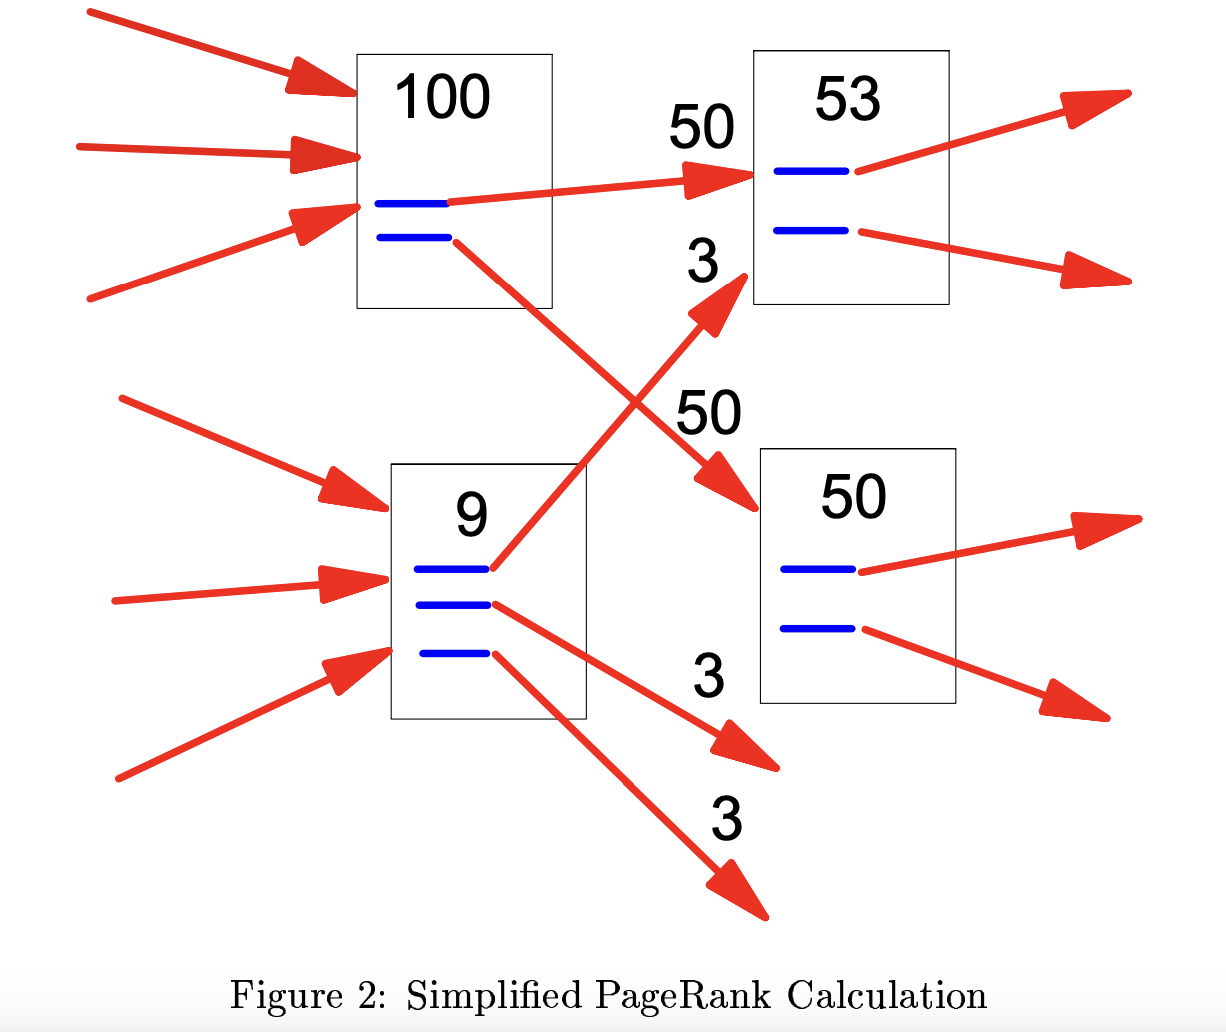